In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 0. Background


## Introduction
The Titanic: Machine Learning from Disaster competition represents an engaging challenge that merges historical significance with predictive analytics. It provides an opportunity for data science enthusiasts and experts to apply machine learning techniques to a dataset that is both rich in history and complexity.

## Problem Definition
The competition's objective is to predict survival on the Titanic, the passenger liner that sank in 1912 after colliding with an iceberg. The event holds substantial historical significance due to the loss of life, particularly because it reflected the societal norms of the era, such as class distinctions. The task of predicting survival is not merely an academic exercise but also a reflection on the human aspects behind data, underscoring the potential of machine learning in understanding human factors in historical events.

## Expected Outputs
The expected output is a predictive model capable of determining the survival outcome for each passenger in the test set. Participants must submit a CSV file with two columns: `PassengerId` and `Survived`. The `Survived` column should contain the binary predictions: 1 for survived and 0 for did not survive. The model's performance is measured based on the accuracy of these predictions.

## Dataset
The provided dataset consists of several attributes for each passenger aboard the Titanic:

  - `PassengerId`: Unique identifier for each passenger.
  - `Survived`: Survival status (0 = No, 1 = Yes).
  - `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
  - `Name`: Name of the passenger.
  - `Sex`: Gender of the passenger (male or female).
  - `Age`: Age of the passenger. Some entries are NaN, indicating missing values.
  - `SibSp`: Number of siblings or spouses aboard.
  - `Parch`: Number of parents or children aboard.
  - `Ticket`: Ticket number.
  - `Fare`: Passenger fare.
  - `Cabin`: Cabin number. Contains NaN values, which represent missing data.
  - `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The dataset will be used to train machine learning models that can discern patterns and associations between the features and the likelihood of survival.

## Problem Type
The challenge is a binary classification problem, a type of supervised learning where the aim is to categorize the passengers into two groups: those who survived and those who did not. The nature of the `Survived` variable as a binary indicator makes it a clear case of classification rather than regression, which would predict continuous outcomes.

## Conclusion
The Titanic Kaggle competition is a testbed for machine learning methodologies, offering insights into the social fabric of the early 20th century while advancing the field of data science. It presents a problem that is both historically enriching and technically stimulating, with the potential to develop predictive models that are not only accurate but also interpretative of the human stories behind the data.
I will use a dataset containing information about those on board to develop a machine learning model that attempts to predict who survived.

# 1. Reading the data

In [2]:
# temel kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here's a description of the data as displayed in the DataFrame:

- **Columns in the DataFrame:**
  - `PassengerId`: Unique identifier for each passenger.
  - `Survived`: Survival status (0 = No, 1 = Yes).
  - `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
  - `Name`: Name of the passenger.
  - `Sex`: Gender of the passenger (male or female).
  - `Age`: Age of the passenger. Some entries are NaN, indicating missing values.
  - `SibSp`: Number of siblings or spouses aboard.
  - `Parch`: Number of parents or children aboard.
  - `Ticket`: Ticket number.
  - `Fare`: Passenger fare.
  - `Cabin`: Cabin number. Contains NaN values, which represent missing data.
  - `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

- **Sample Data:**
  - The first row corresponds to a male passenger with a `PassengerId` of 1, who did not survive, was in 3rd class, and embarked from Southampton (`Embarked` = S).
  - The third row shows a female passenger, `PassengerId` 3, who survived, was in 3rd class, and also embarked from Southampton.
  - There are some missing data points, indicated by `NaN` (not a number), especially in the `Age` and `Cabin` columns, which will require careful handling during data preprocessing for any machine learning tasks.

- **Data Use:**
  - `Survived` is the target variable for the prediction model.
  - Other columns serve as features to train machine learning models to predict the target variable. Features like `Name` and `Ticket` might be used for feature engineering, while `Cabin` and `Age` would need to deal with missing values.

This data is  used to train classification models to predict the `Survived` column, which is a binary outcome indicating whether a passenger survived the Titanic disaster.

# 2.Exploratory Data Analysis (EDA) 

# 2.1 Pclass

"Pclass" signifies the accommodation category for travelers on the Titanic, reflective of their socio-economic stature. 

- 1st Class: This tier was the domain of the affluent and illustrious—magnates, celebrities, or distinguished personas. It offered spacious quarters and superior dining and amenities.

- 2nd Class: Serving as a mid-level option, it was less opulent than 1st Class but provided a comfortable journey for middle-class travelers. The cabins were more compact, and there were fewer luxuries.

- 3rd Class: This was the most basic level of travel, primarily for individuals of modest means, often immigrants or those with lesser financial resources. Accommodations were more confined, with basic amenities.

The Pclass is indicative of the passengers' financial and social ranking. It is a critical factor in survival analysis due to the potential influence of class on emergency response and evacuation procedures during the disaster.

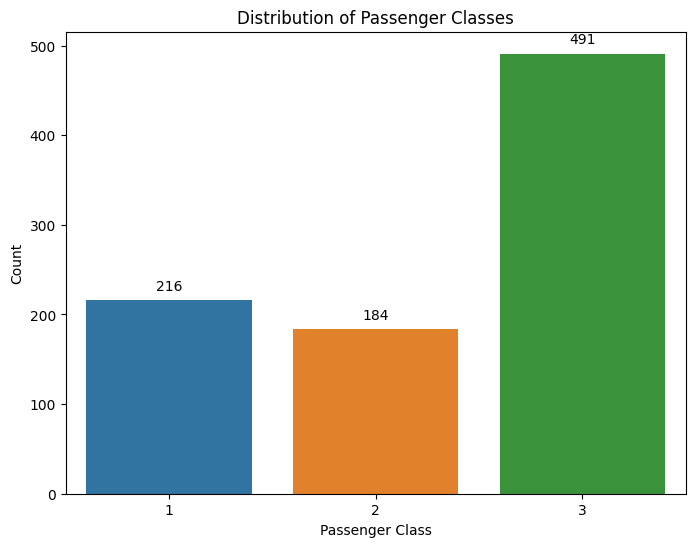

In [4]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Pclass')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Here are some observations and comments based on the chart:

1. **Third Class is the Most Populous:** With 491 passengers, the Third Class had the highest number of passengers compared to the other classes. This reflects the economic demographics of the time, where a larger portion of the population were of lower socio-economic status, which also correlates with the common practice of ships carrying more third-class passengers to maximize ticket sales.

2. **First Class has More Passengers than Second:** There were 216 passengers in First Class and slightly fewer, 184, in Second Class. This could indicate that the Titanic was quite luxurious and attracted a significant number of affluent passengers who could afford the higher fare for better accommodations and services.

3. **Economic Implications:** The distribution shows the economic stratification of society at the time. A substantial number of people were traveling in Third Class, possibly in hope of starting a new life in America, which was a common reason for travel among immigrants during that period.

4. **Implications for Survival Analysis:** Given the larger number of Third Class passengers, if resources and lifeboats were limited and preferentially allocated to higher classes, this could have significantly influenced survival rates. Historical accounts suggest that First Class passengers had better access to lifeboats, which is an important aspect to consider in survival analysis.

5. **Data Visualization Insights:** The bar chart effectively communicates the difference in class sizes, which is crucial for data exploration in predictive modeling. It's a good practice to visualize data this way to understand the underlying distributions before applying machine learning algorithms.

6. **Potential Bias in Model Training:** When training machine learning models on this data, the imbalance in class distribution may introduce bias. Models might perform better at predicting survival for Third Class passengers simply because there are more data points for that class.

Overall, the visualization underscores the importance of considering passenger class as a feature in predictive models and as a factor in historical analyses of the Titanic disaster.

# 2.2 Sex

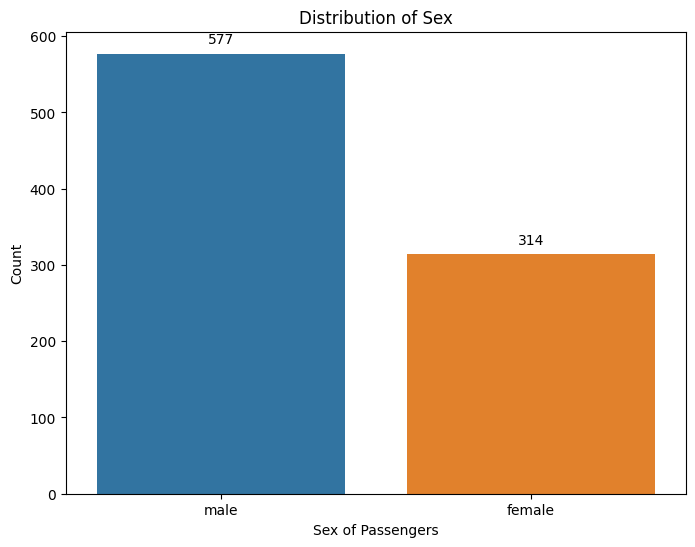

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sex')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Sex')
plt.xlabel('Sex of Passengers')
plt.ylabel('Count')
plt.show()

 Here are some insights and comments regarding the chart:

1. **Gender Disparity:** The chart illustrates that there were considerably more male passengers (577) than female passengers (314) on the Titanic. This reflects the gender demographics of passengers who were traveling at that time.

2. **Implications for Survival Predictions:** Historical records indicate that the protocol of "women and children first" was often followed during maritime disasters. Therefore, despite being outnumbered, female passengers might have had a higher survival rate compared to males, which is a critical consideration for predictive modeling.

3. **Visualization Effectiveness:** The bar chart clearly demonstrates the disparity in numbers between male and female passengers. Such visualizations are important in exploratory data analysis as they provide immediate insights into the dataset's structure before any statistical modeling.

4. **Influence on Model Training:** The imbalance shown here may influence the performance of machine learning models. If the model is not adjusted to account for this imbalance, it may become biased towards predicting the survival of males, simply because there are more male passengers in the dataset.

5. **Historical Context:** The higher number of males might be reflective of the societal norms of the time, where men were more likely to travel alone for business or emigration purposes, while women often traveled with families.

6. **Data Preparation Considerations:** When preparing the dataset for machine learning, it might be beneficial to consider techniques like stratification to ensure that both genders are adequately represented in the training and validation sets.



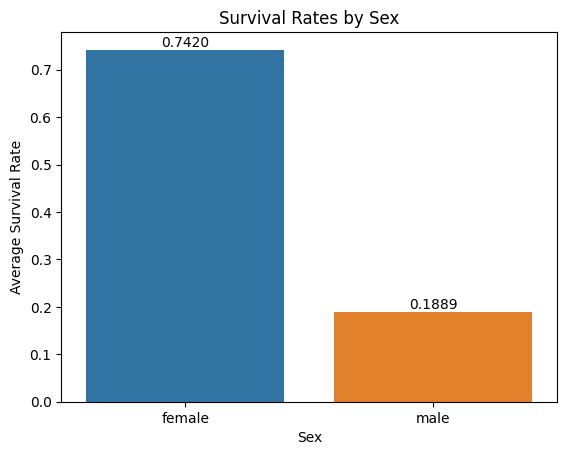

In [6]:
# Calculate the mean survival rates by sex
survival_rates = df.groupby('Sex')['Survived'].mean().reset_index()

# Create the bar plot
sns.barplot(x='Sex', y='Survived', data=survival_rates)

# Adding the actual survival rates on top of the bars
for index, value in enumerate(survival_rates['Survived']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Survival Rates by Sex')
plt.ylabel('Average Survival Rate')
plt.xlabel('Sex')

# Display the plot
plt.show()

Here are some comments and interpretations based on the chart:

1. **Significant Gender-Based Survival Disparity:** The bar chart highlights a stark difference in survival rates between females and males. Female passengers had a much higher survival rate of approximately 74.2%, while the survival rate for male passengers was markedly lower at about 18.9%.



# 2.3. Age

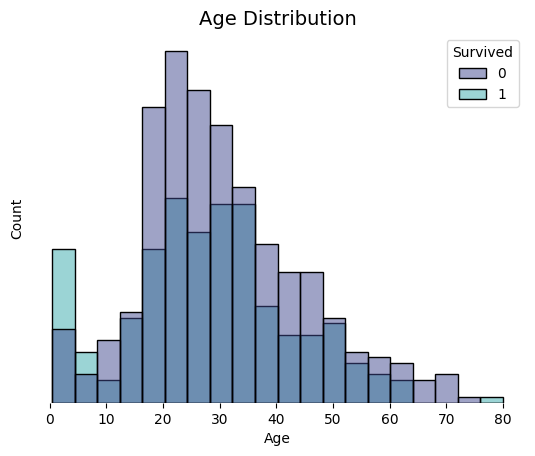

In [7]:
sns.histplot(x="Age", hue="Survived", palette="mako", data=df[["Age","Survived"]])
plt.title("Age Distribution", color='black', fontsize=14) 
plt.yticks([])
plt.box(False)
plt.show()

Here are some comments and insights based on the chart:

1. **Bimodal Distribution:** The age distribution appears to be bimodal, with two peaks suggesting that younger adults and children were the most common age groups among the passengers.

2. **Higher Survival Rate Among Younger Passengers:** The lighter-colored bars, which represent the passengers who survived, seem more prominent in the lower age groups, suggesting that younger passengers had a higher survival rate.

3. **Declining Survival with Age:** There is a noticeable decline in survival rate as age increases, particularly noticeable in passengers older than 30 years old.

4. **Children's Survival:** The survival rate for very young passengers (children) seems to be high, which could be attributed to the "women and children first" policy during lifeboat loading.

5. **Effective Visualization:** This stacked histogram effectively conveys the relationship between age and survival. It allows for easy comparison between the number of survivors and non-survivors within each age group.

6. **Insights for Model Training:** For predictive modeling, this visualization suggests that age could be an important feature, potentially requiring more nuanced treatment such as binning into categorical age groups or creating age-related interaction features.



# 2.4. SibSp

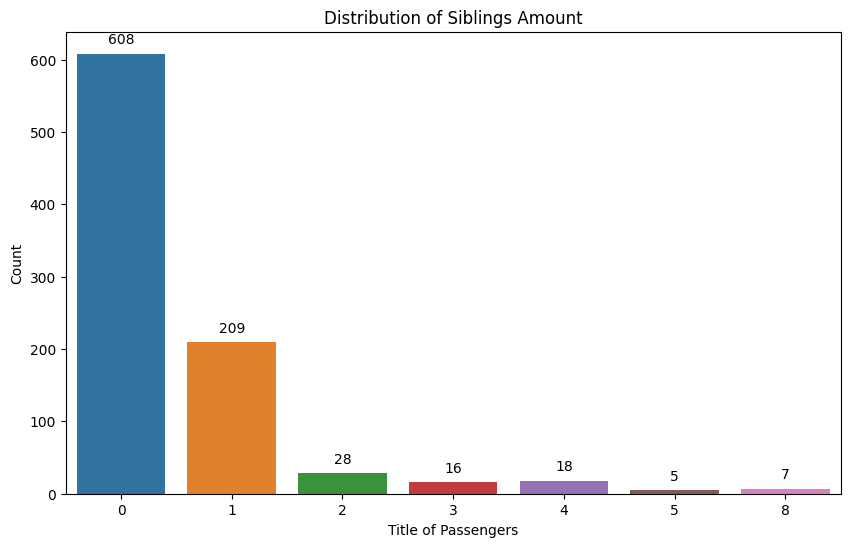

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='SibSp')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Siblings Amount')
plt.xlabel('Title of Passengers')
plt.ylabel('Count')
plt.show()

Here are some observations and insights from the chart:

1. **Most Passengers Traveled Alone:** A significant majority of passengers, indicated by the tallest bar with a count of 608, did not have siblings or spouses on board. This suggests that solo travel was common.

2. **Smaller Family Units:** The second bar, with a count of 209, shows that a substantial number of passengers traveled with one sibling or spouse, indicating smaller family units or couples without children.

3. **Rarity of Large Families:** Very few passengers traveled with more than two siblings or spouses. The counts for passengers with three or more siblings/spouses are markedly lower, which highlights the rarity of large families or sibling groups traveling together.

4. **Exceptional Cases:** There are a few exceptional cases of passengers with large numbers of siblings/spouses on board, such as 5 or 8, which are very uncommon. These could potentially represent larger family groups or possibly group tickets.

5. **Potential Impact on Survival:** The number of siblings/spouses could have implications for survival rates, as those with family aboard might have sought one another out during the disaster, potentially affecting their likelihood of reaching the lifeboats.


This chart provides a clear visual representation of the distribution of family sizes aboard the Titanic, with the majority being individuals or couples.

**Let's examine the survival rate according to the number of siblings or spouses.**


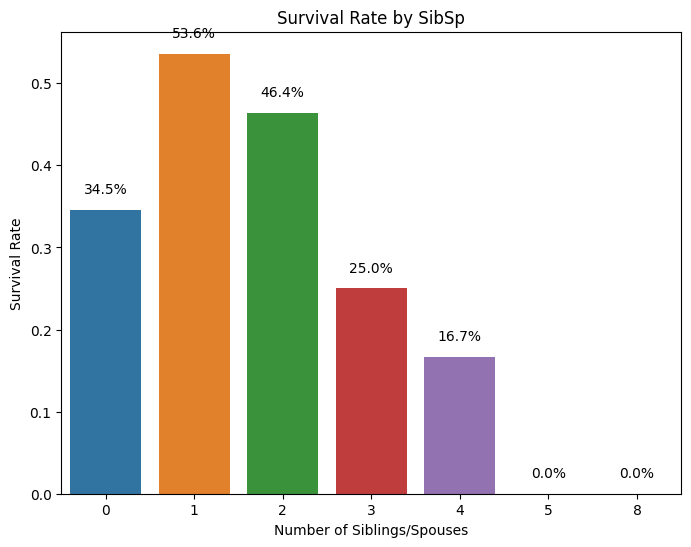

In [9]:
survival_by_sibsp = df.groupby('SibSp')['Survived'].mean()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values)
plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, '{:.1%}'.format(height), ha="center")

plt.show()

Here are some key takeaways from the chart:

1. **Varied Survival Rates:** The survival rates differ across the number of siblings/spouses. Passengers without any siblings or spouses on board had a survival rate of 34.5%, while those with one sibling/spouse had a higher survival rate of 53.6%.

2. **Decreasing Trend with More Siblings/Spouses:** As the number of siblings/spouses increases, there's a general trend of decreasing survival rates. This is evident from the drop to 46.4% for passengers with two siblings/spouses, 25% for those with three, and even lower for four.

3. **Zero Survival for Larger Families:** There are no survivors among the passengers who had five or eight siblings/spouses on board, as indicated by the 0.0% survival rate for these groups.

4. **Highest Survival for Smaller Families:** The highest survival rate is observed among passengers with one sibling/spouse, which could suggest that those with a single family member to look out for could more easily maneuver and access life-saving resources.

5. **Potential Outliers:** The passengers with a very high number of siblings/spouses (such as 5 and 8) are outliers with a survival rate of 0%. This might reflect the difficulty of larger groups to secure a place on lifeboats or could also indicate data entry errors or exceptional cases that warrant further investigation.


This chart provides insight into the dynamics of survival aboard the Titanic and indicates that the presence of family members could have both aided and hindered survival chances, depending on the size of the family.

# 2.5. Ticket

Let's examine the tickets. Individuals who bought identical tickets are regarded as a collective unit and are attributed to a newly created attribute named 'Group_Size'.

In [10]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [11]:
newdf = df.copy()

newdf["Group_Size"] = newdf.groupby("Ticket")["PassengerId"].transform("count")
newdf["Group_Size"] 

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Group_Size, Length: 891, dtype: int64

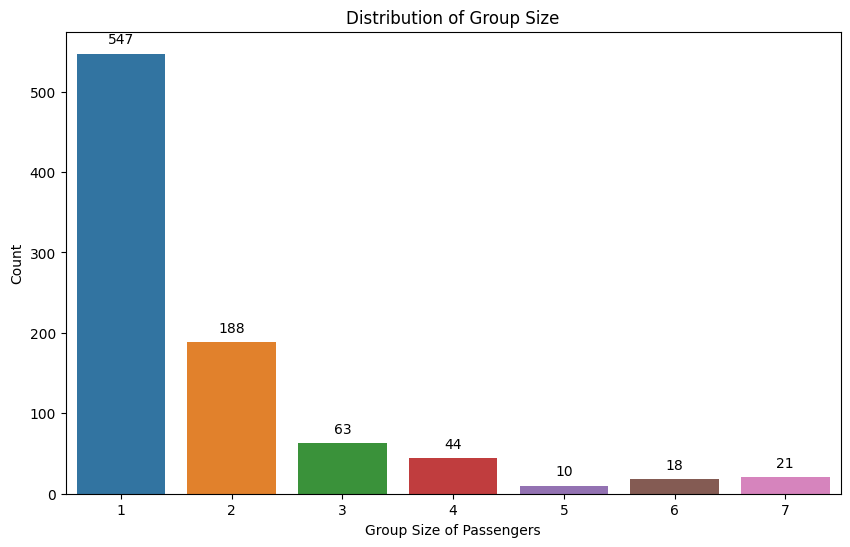

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=newdf, x='Group_Size')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Group Size')
plt.xlabel('Group Size of Passengers')
plt.ylabel('Count')
plt.show()

 Here are some observations from the chart:

1. **Solo Travelers:** The largest bar represents individuals traveling alone (group size of 1), with a count of 547. This indicates that the majority of passengers on the Titanic purchased tickets individually rather than as part of a group.

2. **Small Groups:** The second-largest bar represents groups of two, with a count of 188, suggesting that traveling in pairs was also common. This could include couples or two friends/family members traveling together.

3. **Declining Numbers with Larger Groups:** As the group size increases, the number of such groups decreases significantly. For example, there are only 63 groups of size 3, and even fewer as the size increases.

4. **Larger Groups are Less Common:** Very large groups (such as those with sizes 5, 6, or 7) are much less common, as indicated by the relatively small bar heights for these group sizes.

5. **Potential Family or Tour Groups:** Some of the larger group sizes, like 7, with a count of 21, could indicate families traveling together or organized tour groups.

6. **Implications for Survival Analysis:** The group size may have had an impact on survival rates, as those in larger groups might have had different dynamics when it came to evacuation procedures compared to those traveling alone or in pairs.

This visualization provides a clear representation of how passengers were distributed by group size, which can be a useful feature for understanding social dynamics on the Titanic and for predictive modeling of survival.

# 2.6. Cabin

First, the following steps were performed:

1. Missing values in the 'Cabin' column were filled with the string "Unknown".
2. Only the first letter of each cabin entry was retained to categorize the cabins.
3. A count plot was created to show the count of passengers who did and did not survive, separated by cabin category.


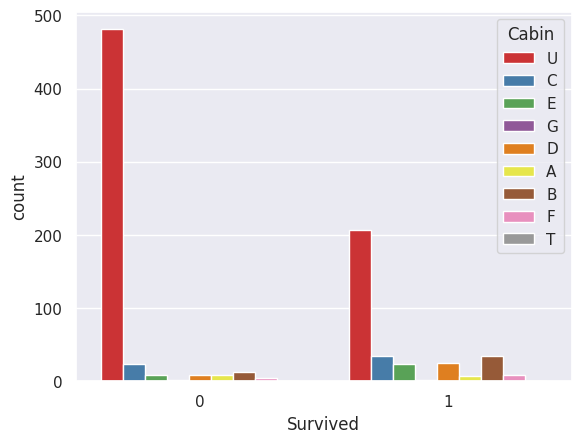

In [13]:
newdf = df.copy()
newdf["Cabin"].fillna("Unknown",inplace=True)
newdf["Cabin"] = newdf["Cabin"].str[0]
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=newdf, hue="Cabin", palette="Set1");


Here are some observations based on the count plot in the image:

- The majority of passengers have an unknown cabin designation, denoted as 'U', with a high non-survival rate.
- Passengers from cabin categories 'C', 'E', 'G', 'D', 'A', 'B', 'F', and 'T' are also represented, with varying counts of survival and non-survival.
- Cabin 'C' has the second-highest count among those who did not survive and a significant count of survivors.
- Cabins 'E' and 'D' show a relatively higher survival rate compared to non-survival.
- The 'T' cabin category has a very low count, which may indicate it's an outlier or a special case.

This visualization suggests that cabin location may have played a role in the passengers' likelihood of survival, which could be related to the proximity to lifeboats or other escape routes. It's worth noting that the high number of unknown cabins can affect the overall analysis and interpretations drawn from this data.

# 2.7. Embarked

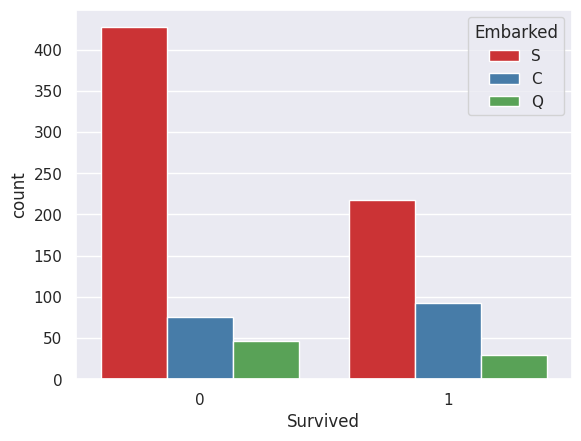

In [14]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Embarked", palette="Set1");

It represents the survival of passengers based on the port where they embarked on the Titanic, with "S" for Southampton, "C" for Cherbourg, and "Q" for Queenstown.

Here are some observations from the chart:

- A larger number of passengers embarked from Southampton (S), with a higher count of those who did not survive (0) compared to those who did (1).
- For passengers who embarked from Cherbourg (C), the survival count is relatively high compared to the non-survival count.
- Queenstown (Q) had the fewest passengers, with a non-survival rate that appears to be slightly higher than the survival rate.
- The survival rate of passengers from Cherbourg stands out as being higher than that of the other two ports.

This chart could suggest that passengers embarking from different ports had different survival rates, possibly due to various factors such as the socioeconomic status of passengers, which could correlate with their point of embarkation, or perhaps the location on the ship where passengers from different ports were accommodated.

# 2.8. And Target Distribution

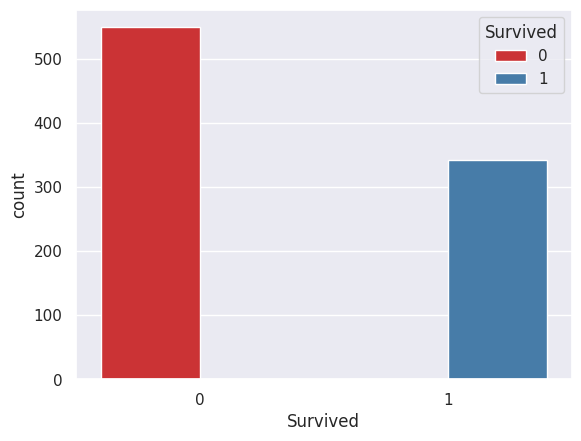

In [15]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Survived", palette="Set1");

 In this chart:

- The red bar represents passengers who did not survive (0).
- The blue bar represents passengers who did survive (1).

Observations from the chart are:

- There are more non-survivors than survivors, with the non-survivors' bar being significantly taller.
- This imbalance in the target variable distribution may suggest a need for stratified sampling or other techniques to address class imbalance when training machine learning models.
- The visualization gives a clear representation of the binary classification nature of the problem, where the goal is to predict one of these two possible outcomes.

# 3. Data Cleaning

In [16]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[ mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "There are " + str(mz_table.shape[0]) +
            "columns that have missing values.")
    return mz_table


missing_zero_values_table(df)

Your selected dataframe has 12 columns and 891 Rows.
There are 3columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,687,77.1,687,77.1,object
Age,0,177,19.9,177,19.9,float64
Embarked,0,2,0.2,2,0.2,object


In [17]:
missing_zero_values_table(test_df)

Your selected dataframe has 11 columns and 418 Rows.
There are 3columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,327,78.2,327,78.2,object
Age,0,86,20.6,86,20.6,float64
Fare,2,1,0.2,3,0.7,float64


`missing_zero_values_table` analyzes the dataframes for zero values and missing values.

Here's a summary of the missing data information provided in the tables:

**Training DataFrame:**
- Contains 13 columns and 891 rows.
- Three columns have missing values:
  - `Cabin`: 687 missing values, which is 77.1% of the total number of rows.
  - `Age`: 177 missing values, 19.9% of the rows.
  - `Embarked`: 2 missing values, 0.2% of the rows.

**Test DataFrame:**
- Contains 11 columns and 418 rows.
- Three columns have missing values:
  - `Cabin`: 327 missing values, 78.2% of the rows.
  - `Age`: 86 missing values, 20.6% of the rows.
  - `Fare`: 1 missing value, 0.2% of the rows, and also 2 zero values.

From this information, we can deduce that:

- The `Cabin` column has a very high percentage of missing values in both datasets, suggesting that it may not be a reliable feature for machine learning models unless some form of imputation or feature engineering is done.
- The `Age` column has a significant, but much smaller, percentage of missing values. Imputation strategies such as median age could be considered.
- The `Embarked` column in the training set and the `Fare` column in the test set have a very small number of missing values and could be filled with the most common value or the median, respectively.
- The presence of two zero values in the `Fare` column of the test set might indicate either free tickets or data entry errors and might require further investigation or a decision on a case-by-case basis.

To clean this data, you would typically fill in the missing values with appropriate statistics (like the median or mode), or possibly infer missing values based on other data. For categorical data like `Cabin` and `Embarked`, you might consider filling in missing values with the most common category, or creating a new category for missing data. For numerical data like `Age` and `Fare`, you might use a measure of central tendency (mean, median) or employ a model-based imputation method.

In [18]:
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] =='female',  'Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data["Embarked"] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] =2
    
    data.drop(["Cabin"],axis=1,inplace=True)

In [19]:
clean_data(df)
clean_data(test_df)

`clean_data`  is written to perform several data cleaning operations on a pandas DataFrame. Below is a description of what each line of code within the function does:

1. `data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())`: This line fills any missing (NaN) values in the 'Fare' column with the median fare calculated from the non-missing values.

2. `data['Age'] = data['Age'].fillna(data['Age'].dropna().median())`: This line fills any missing (NaN) values in the 'Age' column with the median age calculated from the non-missing values.

3. `data.loc[data['Sex'] == 'male', 'Sex'] = 0`: This line converts the categorical 'Sex' data into numerical form, replacing 'male' with 0.

4. `data.loc[data['Sex'] == 'female', 'Sex'] = 1`: Similarly, this line replaces 'female' with 1 in the 'Sex' column.

5. `data['Embarked'] = data['Embarked'].fillna('S')`: This line fills any missing values in the 'Embarked' column with 'S', which likely stands for Southampton, the most common port of embarkation.

6. `data.loc[data['Embarked'] == 'S', 'Embarked'] = 0`: This line assigns a numeric value of 0 to all instances where the embarkation port is 'S'.

7. `data.loc[data['Embarked'] == 'C', 'Embarked'] = 1`: This line assigns a numeric value of 1 to all instances where the embarkation port is 'C'.

8. `data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2`: This line assigns a numeric value of 2 to all instances where the embarkation port is 'Q'.

9. `data.drop(["Cabin"], axis=1, inplace=True)`: This line removes the 'Cabin' column from the DataFrame entirely, which might be due to the high percentage of missing values as shown in the one, making it potentially less useful for predictive modeling.

Overall, this function handles missing values, converts categorical variables to numerical, and drops a column with excessive missing data, which are common steps in preparing data for machine learning algorithms.

# 4. Creating a Model

# 4.1. Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df["Survived"] = df["Survived"].astype(int)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df["Survived"].values


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,stratify=y, random_state = 105)

In [21]:
X_train

array([[2, 1, 17.0, ..., 0, 10.5, 0],
       [3, 1, 14.0, ..., 0, 11.2417, 1],
       [1, 0, 51.0, ..., 0, 26.55, 0],
       ...,
       [1, 0, 45.0, ..., 0, 26.55, 0],
       [3, 0, 27.0, ..., 0, 6.975, 0],
       [3, 0, 21.0, ..., 0, 8.4333, 0]], dtype=object)

In [22]:
y_train

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,

# 4.2. Hyperparameter search

Each dictionary is named after the classifier it is intended for and includes a set of parameters and the range of values to be tested for each. The classifiers and their respective hyperparameters are as follows:

1. **Decision Tree Classifier (`dt_hyperparameters`)**:
   - `min_samples_split`: A range of values from 10 to 500, with a step of 20.
   - `max_depth`: A range of values from 1 to 20, with a step of 2.

2. **Support Vector Machine (`svc_hyperparameters`)**:
   - `kernel`: A fixed value of 'rbf' indicating the use of the radial basis function kernel.
   - `gamma`: A list of potential values `[0.001, 0.01, 0.1]`.
   - `C`: A list of potential regularization parameter values `[1, 10, 50, 100, 250, 500]`.

3. **Random Forest Classifier (`rf_hyperparameters`)**:
   - `max_depth`: A list of potential values `[1, 3, 5,7]`.
   - `min_samples_leaf`: A list of potential values `[1, 3, 5]`.
   - `n_estimators`: The number of trees in the forest with values `[50, 100, 150]`.

4. **K Nearest Neighbors (`knn_hyperparameters`)**:
   - `n_neighbors`: A list of potential values `[1, 3, 5, 7]`.
   - `metric`: A single value 'manhattan', which is a type of distance measurement.

Finally, a list called `classifier_param` is defined which aggregates the dictionaries of hyperparameters for each classifier.

This setup will be used in combination with a grid search cross-validation procedure, where each combination of parameters for each classifier will be tested to find the best performing model based on some evaluation metric. 

In [23]:
dt_hyperparameters= {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_hyperparameters= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1],
                 "C": [1,10,50,100,250,500]}


rf_hyperparameters= {"max_depth":[1,3,5,7],
                "min_samples_leaf":[1,3,5],
                "n_estimators":[50,100,150]}

knn_hyperparameters= {"n_neighbors": [1,3,5,7],
                 "metric":["manhattan"]} 
             
classifier_param = [
                    dt_hyperparameters,
                   svc_hyperparameters,
                   rf_hyperparameters,
                   knn_hyperparameters]

In [24]:
# eğitim için
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.exceptions import ConvergenceWarning
# Suppress ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

random_state=45
classifier = [
             DecisionTreeClassifier(random_state = random_state),
             SVC(),
             RandomForestClassifier(random_state = random_state),
             KNeighborsClassifier()]


cv_result = []
real_test_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    real_test_result.append(clf.score(X_test, y_test)) 

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [25]:
best_estimators

[DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=45),
 SVC(C=500, gamma=0.001),
 RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50,
                        random_state=45),
 KNeighborsClassifier(metric='manhattan', n_neighbors=7)]

These appear to be the best-performing models as determined by a hyperparameter tuning process such as grid search or random search. Here's a summary of the models and their corresponding best hyperparameters:

1. **DecisionTreeClassifier**: Found to perform best with a maximum depth of 7 (`max_depth=7`) and a minimum number of samples required to split an internal node (`min_samples_split=10`). A `random_state` has been set to 45, which is used for initializing the internal random number generator, ensuring reproducibility of the results.

2. **SVC (Support Vector Classifier)**: The optimal hyperparameters for the support vector machine include a regularization parameter `C` set to 500 and a kernel coefficient `gamma` set to 0.001. The kernel is not explicitly mentioned, but since 'rbf' was part of the search space in the hyperparameter search snippet, it is likely that the radial basis function kernel is used.

3. **RandomForestClassifier**: For the random forest, the best parameters include a maximum depth of 3 (`max_depth=3`), a minimum number of samples required to be at a leaf node (`min_samples_leaf=3`), and the number of trees in the forest (`n_estimators=50`). The `random_state` is again set to 45 for reproducibility.

4. **KNeighborsClassifier**: This model is configured to use 7 neighbors (`n_neighbors=7`) and the Manhattan distance metric for its operation.

These models are typically stored in a list after the completion of hyperparameter tuning to easily access the best version of each classifier for further evaluation, ensemble methods, or deployment.

And, the resulting DataFrame cv_results is displayed below the code snippet, showing each classifier along with its corresponding cross-validation mean and test result. The scores are as follows:

In [26]:
cv_results = pd.DataFrame({ "Machine Learning Models":
                                               ["Decision Tree Classifier", 
                                                "Support Vector Machines",
                                                "Random Forest Classifier",
                                                 "K Nearest Neighbors Classifier"],
                           "Cross Validation Mean": cv_result, 
                           "Test Result": real_test_result})
cv_results


,Machine Learning Models,Cross Validation Mean,Test Result
0,Decision Tree Classifier,0.820293,0.866667
1,Support Vector Machines,0.806512,0.833333
2,Random Forest Classifier,0.824012,0.844444
3,K Nearest Neighbors Classifier,0.744136,0.744444


# 4.3. Utilizing Ensemble Learning to Enhance Predictive Accuracy

The provided code snippet is implementing a voting ensemble machine learning model that combines the predictions from three different classifiers: Decision Tree, Random Forest, and K Nearest Neighbors. Each classifier has been previously tuned to find its best hyperparameters. The ensemble model is trained on a dataset, then used to make predictions on a test set. The accuracy of the model on the test set is calculated and printed, resulting in an accuracy of about 87.77%. This high accuracy indicates that the ensemble method is effective for the given prediction task.

In [27]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
                                      ('Decision Tree Classifier', best_estimators[0]), 
                                      ('Random Forest Classifier', best_estimators[2]),
                                      ('K Nearest Neighbors Classifier', best_estimators[3])])
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, voting_pred))

Accuracy:  0.8777777777777778


# 5. Making Predictions on the Original Test Set for the Leaderboard Submission

In [28]:
submission= pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
test =  test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
submission["Survived"]=voting.predict(test)
submission.to_csv('submission.csv',index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
